In [1]:
import copy
import time
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

from Function import NN1,NN2,NN3,NN4,NN5,Window_NN,Model_return,Plot_return,Plot_return_baseline

In [2]:
folderpath = 'C:/Users/deku2/PycharmProjects/AppliedProject/Processing/Processed_data/'
sentiment = pd.read_csv(folderpath + 'Processed_bitcoin_2017-12-01_2021-07-01_withlags_minmax.csv')
sentiment = sentiment.rename(columns={"created_at": "Date"})
sentiment = sentiment.set_index('Date')
price = pd.read_csv(folderpath + 'Processed_BTC-USD_withlags_3%.csv')
price = price.set_index('Date')
data = pd.concat([sentiment,price], axis=1)

In [3]:
X_test = data.drop(columns=['State','State_tmr'])
Y_test = data['State_tmr']
Return_test = X_test['Return']
seed = 123
np.random.seed(seed)
performance_measures = ['precision', 'recall', 'f5', 'roc_auc', 'accuracy']

In [4]:
# Set performance to Performance(Y_train[1096:], y_pred[1096:])
#X_train[912:]
#X_test[1096:]
y_test = [1]*len(Return_test[1096+1:])
baseline = Model_return(Return_test[1096+1:], y_test)
baseline[-1]

1.1929139444651071

In [11]:
import matplotlib.pyplot as plt
def Plot_return_baseline1(returns, baseline):
    df = returns.T
    df['baseline'] = baseline
    df.columns = ['180_moving_window', '365_moving_window', '730_moving_window', 'baseline']
    return df

In [5]:
columns = ['epochs', 'batch_size', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
epochs = [10,10,10]
batch_size = [50, 50, 25]
windows = [180,365,730]
for epoch, batch, window in zip(epochs,batch_size,windows):
    print('epoch =',epoch, '\tbatch =',batch, '\twindow = ', window)
    start = time.time()
    result, model_return = Window_NN(X_test, Y_test, Return_test, window, 1, 0, NN1, epoch, batch)
    end = time.time()
    results.append([epoch,batch,window] + result + [model_return[-1]])
    model_returns.append(model_return)
    print('time taken = ', np.round((end - start)/60, 1), 'min', result)
NN1_under = pd.DataFrame(results,columns=columns)
NN1_under.to_csv(f'NN/NN1_under.csv')
NN1_under_returns = pd.DataFrame(model_returns)
NN1_under_returns.to_csv(f'NN/NN1_under_returns.csv')

epoch = 10 	batch = 50 	window =  180
time taken =  26.0 min [0.23563218390804597, 0.9761904761904762, 0.8709150326797385, 0.5096779719081876, 0.2596685082872928]
epoch = 10 	batch = 50 	window =  365
time taken =  20.0 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]
epoch = 10 	batch = 25 	window =  730
time taken =  13.4 min [0.23204419889502761, 1.0, 0.8870836718115354, 0.5, 0.23204419889502761]


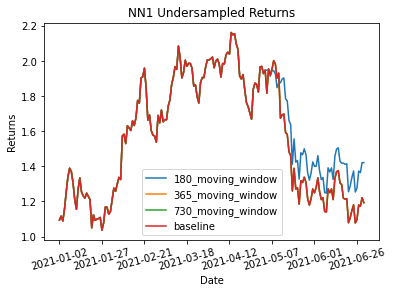

In [12]:
df = Plot_return_baseline1(NN1_under_returns, baseline)
ax = df.plot.line(title='NN1 Undersampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/NN1_under_returns.png', dpi=500, bbox_inches='tight')

In [7]:
columns = ['epochs', 'batch_size', 'windows'] + performance_measures + ['model_return']
results = []
model_returns = []
epochs = [10,10,10]
batch_size = [50, 150, 50]
windows = [180,365,730]
for epoch, batch, window in zip(epochs,batch_size,windows):
    print('epoch =',epoch, '\tbatch =',batch, '\twindow = ', window)
    start = time.time()
    result, model_return = Window_NN(X_test, Y_test, Return_test, window, 1, 1, NN1, epoch, batch)
    end = time.time()
    results.append([epoch,batch,window] + result + [model_return[-1]])
    model_returns.append(model_return)
    print('time taken = ', np.round((end - start)/60, 1), 'min', result)
NN1_over = pd.DataFrame(results,columns=columns)
NN1_over.to_csv(f'NN/NN1_over.csv')
NN1_over_returns = pd.DataFrame(model_returns)
NN1_over_returns.to_csv(f'NN/NN1_over_returns.csv')

epoch = 10 	batch = 50 	window =  180
time taken =  29.6 min [0.27927927927927926, 0.7380952380952381, 0.6942291128337641, 0.5812778348749572, 0.4972375690607735]
epoch = 10 	batch = 150 	window =  365
time taken =  22.9 min [0.23595505617977527, 1.0, 0.8892508143322475, 0.5107913669064748, 0.24861878453038674]
epoch = 10 	batch = 50 	window =  730
time taken =  15.4 min [0.2484076433121019, 0.9285714285714286, 0.8400994200497099, 0.539825282631038, 0.3314917127071823]


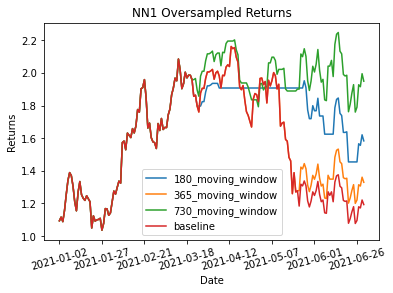

In [13]:
df = Plot_return_baseline1(NN1_over_returns, baseline)
ax = df.plot.line(title='NN1 Oversampled Returns')
ax.set_xlabel("Date")
ax.set_ylabel("Returns")
plt.xticks(rotation=15)
plt.savefig(f'plot/NN1_over_returns.png', dpi=500, bbox_inches='tight')